#### Prerequisites
You will need to install ir_explain first. Once you install the ir-explain library, you may need to restart the kernel. ir_explain also requires Java to be installed. 

In [1]:
%pip install ir-explain

  Using cached ir_explain-0.1-py3-none-any.whl
  Using cached ipython-8.12.3-py3-none-any.whl.metadata (5.7 kB)
  Using cached matplotlib-3.9.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached numpy-1.24.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached pandas-2.2.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached rank_bm25-0.2.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached scikit_learn-1.6.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scipy-1.10.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached sentence_transformers-3.3.1-py3-none-any.whl.metadata (10 kB)
  Using cached scikit_image-0.24.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
  Using cached torch-2.2.0-cp39-cp39-manylinux1_x86_64

#### Building from source
Optionally you can clone the repo from https://github.com/souravsaha/ir_explain.git and build it from the source. 

`!git clone https://github.com/souravsaha/ir_explain.git`

`%cd ir_explain`

`%pip install .`


In [1]:
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64/"

#### Necessary imports


In [2]:
import torch
from ir_explain.eval import PointWiseConsistency, PointWiseCorrectness
from ir_explain.explainers import (EXSPointwiseExplainer,
                                   LirmePointwiseExplainer)
from ir_explain.visualize import TermVisualization
from sentence_transformers import CrossEncoder


[nltk_data] Downloading package stopwords to /home/nlp/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/nlp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/nlp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/home/nlp/anaconda3/envs/irx/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load a reranking model from Huggingface
Let us load ms-marco-electra-base model from Huggingface.

In [3]:
model_name = "cross-encoder/ms-marco-electra-base"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# model = load_your_model()
model = CrossEncoder(model_name, max_length = 512, device = device)


## LIRME Explanation
Invoke the LirmePointwiseExplainer class. It accepts three arguments, 1) complex re-ranking model, 2) index path of the indexer, 3) which indexer you are using, `pyserini`, `no-index`.
Replace the `corpus_path` with the index path, for this example, we are using msmarco-v1-passage from pyserini.

In [ ]:
explainer = LirmePointwiseExplainer(model, corpus_path = "/disk_a/junk/msmarco-v1-passage-full", indexer_type= "pyserini")

In [5]:
# Explain a prediction 
input_q = "what is the daily life of thai people"
input_d = "The following concepts are part of Thai everyday life: à¹ƒà¸ˆà¹€à¸¢à¹‡à¸™ or JAI YEN is more a way of life, it is to keep your temper whatever the situation. Thai people are educated in the family and in school to keep frustration inside. Instead of showing their anger toward a problem or situation, Thai people show JAI YEN, i.e. calm or patience. "


#### Parameters dictionary for LIRME 

In [6]:
# parameters for LIRME
params = {
    "sampling_method" : "masking",
    "top_terms" : 20,
    "kernel_range" : [5,10]
}

In [8]:
input_d = '8139258' 
explanation_vectors, ranked_lists = explainer.explain(input_q, input_d, params)


You wanted to explain with LIRME
pyserini
len(samples_generated) :  201
example sample:
 [': à¹\x83à¸\x88à¹\x80à¸¢à¹\x87à¸\x99 or JAI YEN is more a way of situation . T hai people are educated in the family and in school to keep frustration inside . Instead of people show JAI YEN , i.e . calm or patience .']
document score [0.9912423]
1
size of the samples 201
size of the sample scores 201
document score [0.9912423]
Document score 0.9912423


### Visualize the explanations

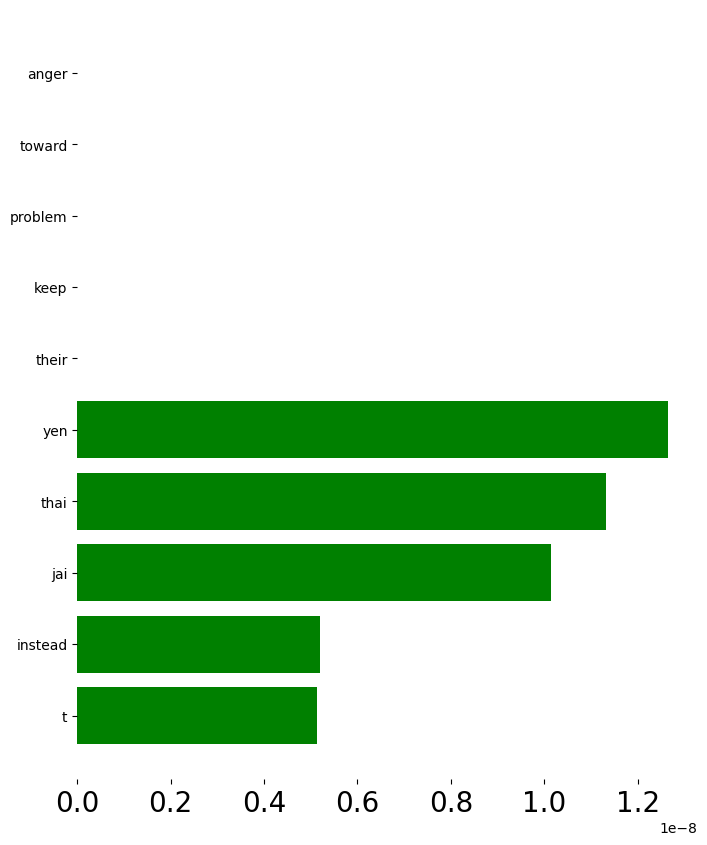

In [9]:
termVisualization = TermVisualization()
termVisualization.visualize(explanation_vectors[0]["term_vector"], show_top=5)

### Evaluate the explanations
Invoke the evaluate function of the PointWiseCorrectness class. Three parameters need to be passed to this evaluation module, i) `query_id`, ii) `doc_id`, and iii) `explanation_vector` 

In [10]:
pointWiseCorrectness = PointWiseCorrectness(explainer)
pointWiseCorrectness.evaluate(query_id = '1112341', doc_id = '8139258', explanation_vector = explanation_vectors[0]["term_vector"])


TrecQrel(query_id='1112341', doc_id='1369480', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='1373646', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='1373648', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='1707321', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='2173822', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='2468293', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='2468300', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='2596431', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='263958', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='2694630', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='2735215', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='3408235', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='3490001', relevance=1, iteration='Q0')
TrecQrel(quer

(5.031455133609423e-05, array([[1.]]))

Similarly for consistency metric invoke the evaluate function.

In [11]:
pointWiseConsistency = PointWiseConsistency(explainer)
# kernel_ranges 
pointWiseConsistency.evaluate(query_id = '1112341', doc_id = '8139258', explanation_vector = ranked_lists)


Evaluation: 
0.06315789473684211


## EXS Explanation

Invoke the EXSPointwiseExplainer class. It accepts five arguments, 1) complex re-ranking model, 2) index path of the indexer, 3) which indexer you are using, `pyserini`, `no-index`, 4) Surrogate model, either `lr` (Logistic regression) or `svm` (Support vector machine), and 5) number of perturbed instances (default is set ot 100)

In [12]:
explainer = EXSPointwiseExplainer(model, corpus_path = "/disk_a/junk/msmarco-v1-passage-full", indexer_type= "pyserini", exs_model = 'svm', num_samples = 100)


In [13]:
# Explain a prediction 
input_q = "what is the daily life of thai people"

# TODO : show the rank and re-rank pipeline
input_d = "The following concepts are part of Thai everyday life: à¹ƒà¸ˆà¹€à¸¢à¹‡à¸™ or JAI YEN is more a way of life, it is to keep your temper whatever the situation. Thai people are educated in the family and in school to keep frustration inside. Instead of showing their anger toward a problem or situation, Thai people show JAI YEN, i.e. calm or patience. "


#### Parameter vector for EXS

In [14]:
# parameters for EXS
params = {
    "doc_ids" : ['8139255', '8139258', '8139256', '6164791', '90432', '2735215', '2096427', '6016292', '6740558', '2096429'],
    "rerank_scores" : [9.7950637e-01, 1.9957299e-05, 2.2687145e-05, 9.8405325e-01, 9.8600733e-01, 3.4078690e-05, 4.0367260e-04, 5.9412047e-05, 3.2782576e-05, 5.1955116e-04], 
    "rank" : 2
}

In [15]:
input_d = {"id" : "8139258", "contents" : "The following concepts are part of Thai everyday life: a or JAI YEN is more a way of life, it is to keep your temper whatever the situation. Thai people are educated in the family and in school to keep frustration inside. Instead of showing their anger toward a problem or situation, Thai people show JAI YEN, i.e. calm or patience." }


In [16]:
explanation_vectors, ranked_lists = explainer.explain(input_q, input_d, "topk-bin", params)


Inside def explain, scores_topk:
 [0.98600733, 0.98405325]
***********DEBUG****************
query:  what is the daily life of thai people
doc_rank:  1
doc_exp:  {'id': '8139258', 'contents': 'The following concepts are part of Thai everyday life: a or JAI YEN is more a way of life, it is to keep your temper whatever the situation. Thai people are educated in the family and in school to keep frustration inside. Instead of showing their anger toward a problem or situation, Thai people show JAI YEN, i.e. calm or patience.'}
scores_topk:  [0.98600733, 0.98405325]
method:  topk-bin
seed:  10
***********DEBUG****************
document orig: {'id': '8139258', 'contents': 'The following concepts are part of Thai everyday life: a or JAI YEN is more a way of life, it is to keep your temper whatever the situation. Thai people are educated in the family and in school to keep frustration inside. Instead of showing their anger toward a problem or situation, Thai people show JAI YEN, i.e. calm or pati

99it [00:00, 2939.06it/s]

lables_perturb unique:  [0 1]
Inside def explain_single, self.exs_model:  svm
pyserini
item ('and', -0.9164566702224319)
item ('anger', 10.023819054010604)
item ('are', -7.420723288024247)
item ('calm', 4.147021333111047)
item ('concepts', -2.559804537626661)
item ('educated', -3.870467633387735)
item ('everyday', 28.90557138854151)
item ('family', 6.957529864722876)
item ('following', 2.037754694971042)
item ('frustration', -0.7548655707912513)
item ('in', -7.903124923149699)
item ('inside', 5.1373817743622885)
item ('instead', -11.655308095031058)
item ('is', -2.7961310592106834)
item ('it', 5.880847289618903)
item ('jai', 2.2894965515437113)
item ('keep', -8.208086617129213)
item ('life', 14.712261754578055)
item ('more', 3.104442223650658)
item ('of', -2.8945109216945366)
item ('or', -9.32352081757157)
item ('part', -7.421705805710776)
item ('patience', 7.709316634744154)
item ('people', 16.03159854592678)
item ('problem', 0.6939329054849641)
item ('school', 1.5384922978378432)
ite

### Visualize the explanations

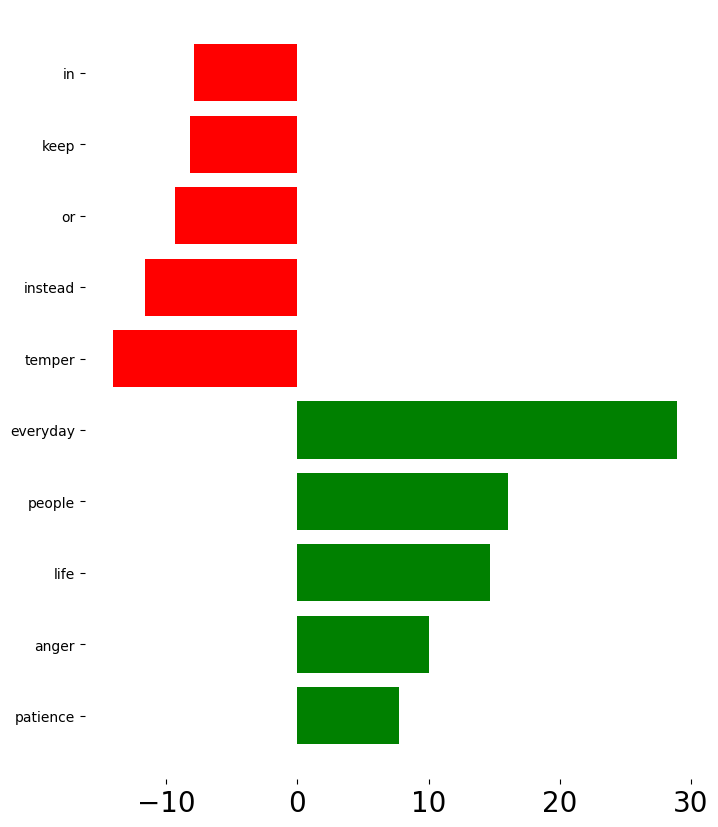

In [17]:
termVisualization = TermVisualization()
termVisualization.visualize(explanation_vectors[0]["term_vector"], show_top=5)

### Evaluate the explanations

In [18]:
pointWiseCorrectness = PointWiseCorrectness(explainer)
pointWiseCorrectness.evaluate(query_id = '1112341', doc_id = '8139258', explanation_vector = explanation_vectors[0]["term_vector"])


TrecQrel(query_id='1112341', doc_id='1369480', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='1373646', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='1373648', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='1707321', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='2173822', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='2468293', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='2468300', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='2596431', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='263958', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='2694630', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='2735215', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='3408235', relevance=1, iteration='Q0')
TrecQrel(query_id='1112341', doc_id='3490001', relevance=1, iteration='Q0')
TrecQrel(quer

(1.2700071324203965, array([[0.94305373]]))

In [21]:
# pointWiseConsistency = PointWiseConsistency(explainer)
# Please note that for EXS pointwise consistency does not make sense, as we are not generating any explanations 
# for similar ranges, in LIRME "kernel_range" : [5,10] -> we are generating explanation vectors for these two 
# kernel_ranges 
# pointWiseConsistency.evaluate(query_id = '1112341', doc_id = '8139258', explanation_vector = ranked_lists)


## Pairwise Component


In [22]:
from ir_explain.explainers import PairwiseAxiomaticExplainer
index_path = ""

### Query and a pair of documents
TODO: Create a retrieve and re-rank pipeline

In [23]:
query_text = "Exons Definition Biology"
doc1 = "Herbivory: Definition & Examples 4:44 Next Lesson. Allometric Growth: Definition & Example; Isometric Growth: Definition & Example; Go to AP Biology - Animal Behavior: Help and Review"
doc2 = "Chitin (biology) Definition, meaning online encyclopedia mimi. (2) a polysaccharide which makes up the cell walls of fungi and exoskeleton of insects a tough, semitransparent substance that is the main component of the exoskeletons of art"


Create an instance of the pairwise class


In [24]:
pairwise_instance = PairwiseAxiomaticExplainer(query_text, doc1, doc2, index_path)
axiom_classes = [pairwise_instance.TFC1(), pairwise_instance.LB1(), pairwise_instance.AND(), pairwise_instance.DIV(), pairwise_instance.PROX1()]


In [25]:
explanation = pairwise_instance.explain(axiom_classes)

Different arithmatic operations of the selected Axioms


In [26]:
axiom_classes = [4*pairwise_instance.LNC1() + 3*pairwise_instance.TFC1(), (-1)*pairwise_instance.DIV(), pairwise_instance.PROX1() + pairwise_instance.PROX2() + pairwise_instance.PROX3() ]
explanation = pairwise_instance.explain(axiom_classes)

print(explanation)

                      Query                    Document 1  \
0  Exons Definition Biology  Herbivory: Definition & E...   

                     Document 2  CombinedAxiom  ScaledAxiom  
0  Chitin (biology) Definiti...              0            1  


### Explain details component
Provide fine grained explanation for the selected axioms

In [27]:
axiom_name = "PROX1"
explanation = pairwise_instance.explain_details(axiom_name)
print(explanation)

                          Metric  Document 1  Document 2
0                      tf(Exons)    0.000000         0.0
1                 tf(Definition)    3.000000         0.0
2                    tf(Biology)    1.000000         0.0
3    avg_dist(Exons, Definition)    6.500000         0.0
4       avg_dist(Exons, Biology)    0.000000         0.0
5  avg_dist(Definition, Biology)    6.500000         0.0
6                      num pairs    3.000000         3.0
7                 Total_avg_dist    4.333333         0.0


## Listwise Component
Let us start this component by importing various modules

In [28]:
import json

import numpy as np
import torch
from ir_explain.explainers import (BFSListwiseExplainer,
                                   GreedyListwiseExplainer,
                                   IntentListwiseExplainer,
                                   MultiplexListwiseExplainer)
from ir_explain.utils.utility import load_from_res
from pyserini.analysis import Analyzer, get_lucene_analyzer
from pyserini.search.lucene import LuceneSearcher
from sentence_transformers import CrossEncoder

### Query string and query id 
One can fetch query and query id from ir_datasets (https://ir-datasets.com/) 


In [29]:
query_str = "what is the daily life of thai people"
query_id = '1112341'


In [31]:
# provide res file path of the blackbox ranker
project_path = "/disk_a/junk/explain/ir_explain/"
res_file_path = project_path + "examples/runs/NRMs/ANCE.2019.res"

# MSMARCO index path: 
# one can download a pre-built index from pyserini
index_path = "/disk_a/junk/msmarco-v1-passage-full"

# load dense ranking result and scores
dense_ranking, dense_scores = load_from_res(res_file_path)

dense_ranking_list = dense_ranking['1112341']
dense_score_list = dense_scores['1112341']

Initialize the parameters of BFS


In [32]:
params = {
    "QUEUE_MAX_DEPTH" : 1000,
    "BFS_MAX_EXPLORATION" : 30,
    "BFS_VOCAB_TERMS" : 30,
    "BFS_MAX_DEPTH" : 10,
    "BFS_TOP_DOCS" : 10,
    "CORRELATION_MEASURE" : "RBO",
    }
exp_model = "bm25"
indexer_type = "pyserini"


Initialize the BFSListwiseExplainer class. It accepts four arguments, 1) index path, 2) which indexer you are using, `pyserini`, `no-index`, 3) Simple ranking model, `bm25`, and 4) parameter dictionary

In [33]:
# # initialize the BFS class
bfs = BFSListwiseExplainer(index_path, indexer_type, exp_model, params)

In [34]:
# # initialize LuceneSearcher, we use LuceneSearcher from pyserini
searcher = LuceneSearcher(index_path)
searcher.set_bm25(1.2, 0.75)     # set BM25 parameter
searcher.set_analyzer(get_lucene_analyzer(stemmer='porter'))

# retrieve with BM25 
bm25_hits = searcher.search(query_str)

# set parameters for RM3
searcher.set_rm3(1000, 10, 0.9)

# generate the feedback terms 
term_weight_list = searcher.get_feedback_terms(query_str)

# sort the feedback terms
term_weight_list = dict(sorted(term_weight_list.items(), key=lambda item: item[1], reverse = True))


In [35]:
# # call BFS explainer module
print(bfs.explain(query_id, query_str, term_weight_list, searcher, dense_ranking, debug = False))


(0.08670945845571429, 'thai everydai isan languag life')


### Greedy component

In [36]:
# # initialize the parameters of Greedy
params = {
    "GREEDY_VOCAB_TERMS" : 100,
    "GREEDY_TOP_DOCS_NUM" : 10,
    "GREEDY_MAX_DEPTH" : 10,
    "BFS_TOP_DOCS" : 10,
    "CORRELATION_MEASURE" : "RBO"
    }

exp_model = "bm25"

Initialize the GreedyListwiseExplainer class. It accepts four arguments, 1) index path, 2) which indexer you are using, `pyserini`, `no-index`, 3) Simple ranking model, `bm25`, and 4) parameter dictionary

In [37]:
# # initialize the Greedy class
greedy = GreedyListwiseExplainer(index_path, indexer_type, exp_model, params)

In [38]:
# we use LuceneSearcher from pyserini
searcher = LuceneSearcher(index_path)
searcher.set_bm25(1.2, 0.75)     # set BM25 parameter
searcher.set_analyzer(get_lucene_analyzer(stemmer='porter'))

# retrieve with BM25 
bm25_hits = searcher.search(query_str)

# set parameters for RM3
searcher.set_rm3(1000, 10, 0.9)   # set parameter for rm3

# generate the feedback terms
term_weight_list = searcher.get_feedback_terms(query_str)

# sort the feedback terms
term_weight_list = dict(sorted(term_weight_list.items(), key=lambda item: item[1], reverse = True))

In [39]:
# call Greedy explainer module
print(greedy.explain(query_id, query_str, term_weight_list, searcher, dense_ranking, debug = False))


(0.02329305903, ' vast isan thai life everydai jai yen situat sanuk import')


### IntentEXS Component

In [40]:
searcher = LuceneSearcher(index_path)
# for the top k documents fetch their contents
docs = dict([(hit, json.loads(searcher.doc(hit).raw())['contents']) for hit in dense_ranking_list[:20]])

# Load a reranking model
model_name = "cross-encoder/ms-marco-electra-base"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [41]:
# model = load_your_model()
reranker = CrossEncoder(model_name, max_length = 512, device = device)


In [ ]:
corpus = {'query': query_str,
        'scores': dict([(doc_id, score) for doc_id, score in zip(dense_ranking_list[:20], dense_score_list[:20])]),
        'docs': docs
    }

# set parameters for IntentEXS
params = {'top_idf': 200, 'topk': 20, 'max_pair': 100, 'max_intent': 20, 'style': 'random'}

Initialize the IntentListwiseExplainer class. It accepts four arguments, 1) complex reranking model, 2) index path, 3) which indexer you are using, `pyserini`, `no-index`, and 4) Simple ranking model, `bm25`, `lmjm`, `lmdir`, `saliency`, `semantic`.

In [44]:
# Init the IntentEXS object.
Intent = IntentListwiseExplainer(reranker, index_path, indexer_type, 'bm25')

# call explain method of IntentEXS
expansion = Intent.explain(corpus, params)

docid: 8606160
docid: 6726340
docid: 6726344
docid: 4416075
docid: 4936256
docid: 8606161
docid: 6342847
docid: 8139257
docid: 8139255
docid: 550571
docid: 7687411
docid: 5043407
docid: 7079776
docid: 6681385
docid: 8139256
docid: 90432
docid: 4936258
docid: 8139258
docid: 2173822
docid: 3795887


In [46]:
print(f"Explanation terms are: ", expansion)

Explanation terms are:  ['thai', 'time', 'monk', 'dita', 'awai', 'fo', 'chai', 'it', 'us', "i'm"]


### Multiplex Component
Set parameters for Multiplex

In [ ]:
params = {
    "dataset" : "clueweb09",
    "top_d" : 10,
    "top_tfidf" : 100,
    "top_r" : 50,
    "candi_method" : "bm25",
    "ranked" : 5,
    "pair_num" : 20,
    "max_k" : 10,
    "min_k" : 4,
    "candidates_num" : 20,
    "style" : "random",
    "vote" : 1,
    "tolerance" : .005,
    "EXP_model" : "language_model",
    "optimize_method" : "geno",
    "mode" : "candidates"
    }
# pass the topk file
params ["top_file"] = "/a/administrator/codebase/neural-ir/RankingExplanation_bkp/Datasets/src/clueweb09/top.tsv"
# pass the query file
# Notice here we are passing Clueweb09b query files
params ["queries_file"] = "/a/administrator/codebase/neural-ir/RankingExplanation_bkp/Datasets/src/clueweb09/queries.tsv"


In [48]:
# one can fetch query and query id from ir_datasets (https://ir-datasets.com/)
query_str = 'lps laws definition'
qid = '443396'

project_path = "/disk_a/junk/explain/ir_explain/"

# provide res file path of the blackbox ranker
res_file_path = project_path + "examples/runs/NRMs/ANCE.2019.res"

# MSMARCO index path:
# one can download it from pyserini
index_path = "/disk_a/junk/msmarco-v1-passage-full"

# load dense ranking result and scores
dense_ranking, dense_scores = load_from_res(res_file_path)

dense_ranking_list = dense_ranking['443396']
dense_score_list = dense_scores['443396']

params["dense_ranking"] = dense_ranking_list
params["dense_ranking_score"] = dense_score_list


Initialize the MultiplexListwiseExplainer class. It accepts two arguments, 1) index path, 2) which indexer you are using, `pyserini`, `no-index`.

In [49]:
# initialize the Multiplex class
multi = MultiplexListwiseExplainer(index_path, indexer_type)
params["EXP_model"] = "multi"
params["optimize_method"] = "geno_multi"

Call the explainer module with the query id, query string and a list of parameters 

In [50]:
# call Multiplex explainer module
explanation_terms = multi.explain(qid, query_str, params)

Initiating indexes...
index path :  /disk_a/junk/msmarco-v1-passage-full
refine_method:  <bound method Explain.refine_candidates_by_bm25 of <ir_explain.explainers.listwise.multiplex_base.Explain object at 0x7525c70f2d30>>


Perturb each doc...: 0it [00:00, ?it/s]

doc_id :  8536118
topk :  100
replaced_tokens :  ['lp', 'lanterman', 'petri', 'act', 'grave', 'shelter', 'provid', 'unabl', 'sponsor', 'legisl', 'judg', 'themselv', 'cloth', 'disabl', 'thu', 'california', 'short', 'protect', 'law', 'treatment', 'food', 'person', 'name']


Perturb each doc...: 1it [00:00,  5.51it/s]

term_score:   [('lanterman', 7.957176208496094), ('lp', 5.785079002380371), ('petri', 5.452098846435547), ('grave', 4.17691707611084), ('shelter', 3.91019344329834), ('unabl', 3.5600638389587402), ('sponsor', 3.535909652709961), ('legisl', 3.449584484100342), ('judg', 3.370941162109375), ('themselv', 3.171919822692871), ('cloth', 3.0950498580932617), ('disabl', 3.0724010467529297), ('act', 3.030970573425293), ('thu', 2.923902750015259), ('california', 2.6756181716918945), ('short', 2.4847943782806396), ('protect', 2.434162139892578), ('law', 2.3346714973449707), ('treatment', 2.324326276779175), ('provid', 2.2820849418640137), ('food', 2.02036452293396), ('person', 1.8981037139892578), ('name', 1.7549288272857666)]
doc_id :  4526747
topk :  100


Perturb each doc...: 2it [00:00,  6.30it/s]

replaced_tokens :  ['lp', 'lightn', 'personnel', 'system', 'discharg', 'conduct', 'equip', 'electr', 'earth', 'damag', 'pass', 'enter', 'structur', 'leav', 'non', 'protect', 'light', 'build', 'without', 'provid', 'mean', 'mai']
term_score:   [('lp', 4.545366287231445), ('lightn', 4.153478622436523), ('personnel', 3.735363006591797), ('discharg', 3.5076370239257812), ('conduct', 3.021529197692871), ('equip', 2.93345308303833), ('electr', 2.695322036743164), ('earth', 2.675153970718384), ('damag', 2.576019763946533), ('pass', 2.5306732654571533), ('enter', 2.50913667678833), ('structur', 2.5076589584350586), ('leav', 2.457265853881836), ('non', 2.451356887817383), ('protect', 2.446615695953369), ('light', 2.4170005321502686), ('build', 2.3896450996398926), ('system', 2.346200704574585), ('without', 2.2416763305664062), ('provid', 1.793045997619629), ('mean', 1.7671213150024414), ('mai', 1.401613712310791)]
doc_id :  7894178
topk :  100
replaced_tokens :  ['lop', 'contract', 'provid', 'ca

Perturb each doc...: 4it [00:00,  7.36it/s]

term_score:   [('lop', 7.204584121704102), ('sue', 4.292145729064941), ('proce', 3.7539901733398438), ('settlement', 3.5661253929138184), ('contract', 3.4446706771850586), ('honor', 3.2910356521606445), ('fail', 3.1285905838012695), ('agreement', 3.096040725708008), ('care', 2.8482260704040527), ('letter', 2.800321102142334), ('health', 2.667990207672119), ('provid', 2.4865589141845703), ('protect', 2.3737473487854004), ('sign', 2.2638068199157715), ('pai', 2.1178712844848633), ('right', 1.926067590713501), ('state', 1.4961869716644287), ('ha', 1.2357327938079834)]
doc_id :  3323246
topk :  100
replaced_tokens :  ['logger', 'lp', 'malwar', 'linux', 'lightweight', 'credenti', 'portabl', 'cd', 'era', 'expos', 'ill', 'goal', 'internet', 'privat', 'kei', 'user', 'risk', 'secur', 'comput', 'data', 'without', 'allow', 'live', 'base', 'work']
term_score:   [('logger', 5.621511459350586), ('lp', 4.5222296714782715), ('malwar', 4.521644592285156), ('linux', 4.196924209594727), ('lightweight', 4

Perturb each doc...: 6it [00:00,  8.41it/s]

term_score:   [('lp', 6.711219787597656), ('succinct', 5.684826374053955), ('interestingli', 4.653103828430176), ('2.5', 4.498225212097168), ('1.2', 3.9302849769592285), ('crack', 3.5106029510498047), ('section', 3.286587715148926), ('iâ', 3.200550079345703), ('standard', 2.9541075229644775), ('definit', 2.6879255771636963), ('write', 2.634347438812256), ('defin', 2.4874353408813477), ('requir', 2.449493885040283), ('cover', 2.2640695571899414), ('take', 1.6933062076568604), ('claus', 0.0)]
doc_id :  2373504
topk :  100
replaced_tokens :  ['lawyer', 'lpp', 'advic', 'client', 'prudenti', 'legal', 'profession', 'nowadai', 'disclos', 'privileg', 'refus', 'entitl', 'suprem', 'appeal', 'absolut', 'heard', 'seek', 'qualifi', 'rais', 'parti', 'court', 'document', 'third', 'rule', 'question', 'answer', 'case', 'give', 'howev', 'mani', 'ha']
term_score:   [('lpp', 6.534953594207764), ('prudenti', 5.224984169006348), ('lawyer', 4.426226615905762), ('nowadai', 4.187894821166992), ('advic', 4.0724

Perturb each doc...: 7it [00:00,  7.77it/s]

term_score:   [('lgp', 6.622589588165283), ('schemeâ', 6.466721057891846), ('statutori', 4.153966903686523), ('parliament', 3.9906930923461914), ('voluntari', 3.9028282165527344), ('scheme', 3.7412710189819336), ('sector', 3.500711441040039), ('contractor', 3.347379684448242), ('polic', 3.1376380920410156), ('staff', 2.9739608764648438), ('agenc', 2.8167505264282227), ('privat', 2.7839879989624023), ('environ', 2.742035388946533), ('regul', 2.7370717525482178), ('primari', 2.6339805126190186), ('pass', 2.443173885345459), ('educ', 2.4323508739471436), ('higher', 2.377556800842285), ('govern', 2.3487348556518555), ('benefit', 2.320084571838379), ('public', 2.3139848709106445), ('member', 2.299055576324463), ('local', 2.279329299926758), ('term', 1.9381227493286133), ('set', 1.9202170372009277), ('servic', 1.829930305480957), ('ha', 1.2296290397644043)]
doc_id :  7754378
topk :  100
replaced_tokens :  ['sol', 'sexua', 'statut', 'limit', 'lawsuit', 'occurr', 'injur', 'victim', 'circumst',

Perturb each doc...: 9it [00:01,  7.31it/s]

term_score:   [('sexua', 7.837491989135742), ('sol', 6.202329635620117), ('statut', 4.702395915985107), ('lawsuit', 3.978632926940918), ('occurr', 3.789947032928467), ('injur', 3.590909957885742), ('victim', 3.5903425216674805), ('circumst', 3.4958930015563965), ('limit', 3.033017635345459), ('unless', 2.996958017349243), ('civil', 2.9270808696746826), ('injuri', 2.7609899044036865), ('initi', 2.6899380683898926), ('child', 2.5439774990081787), ('special', 2.3953685760498047), ('date', 2.3003039360046387), ('begin', 2.2880005836486816), ('run', 2.2253291606903076), ('case', 2.1170237064361572), ('person', 1.8695545196533203), ('state', 1.5111899375915527), ('time', 1.3704638481140137), ('caus', 0.0)]
doc_id :  5158745
topk :  100
replaced_tokens :  ['scheme', 'lgp', 'councillor', 'nationwid', 'valuabl', 'reward', 'work', 'particip', 'packag', 'employ', 'employe', 'govern', 'local', 'pai', 'part']
term_score:   [('lgp', 7.077018737792969), ('councillor', 6.03324031829834), ('scheme', 5.

Perturb each doc...: 10it [00:01,  6.60it/s]

term_score:   [('penden', 6.344125747680664), ('lawsuit', 4.018932342529297), ('ownership', 3.6530113220214844), ('notic', 3.60044527053833), ('li', 3.30959415435791), ('estat', 2.9773240089416504), ('file', 2.9608073234558105), ('concern', 2.9198086261749268), ('titl', 2.741818428039551), ('written', 2.7303903102874756), ('claim', 2.6645991802215576), ('land', 2.552661418914795), ('real', 2.491659641265869), ('involv', 2.471470355987549), ('interest', 2.4700183868408203), ('properti', 2.413048267364502), ('either', 2.3701090812683105), ('law', 2.322847843170166), ('record', 2.2765445709228516), ('offic', 2.256345748901367), ('counti', 2.2407093048095703), ('usual', 1.916391134262085), ('ha', 1.2607660293579102), ('us', 0.9715535640716553)]
refined_candidates :  {'lanterman': 7.957176208496094, 'sexua': 7.837491989135742, 'lop': 7.204584121704102, 'lgp': 6.849804162979126, 'lpp': 6.534953594207764, 'schemeâ': 6.466721057891846, 'penden': 6.344125747680664, 'sol': 6.202329635620117, 'co

Difference : [2.44140625e-04 2.62451172e-03 2.80761719e-03 ... 7.75146484e-01
 2.14367676e+00 1.36853027e+00]
final list:  20
[(80, 130), (282, 884), (279, 608), (570, 594), (96, 906), (496, 547), (235, 504), (524, 849), (206, 226), (263, 916), (318, 760), (607, 849), (59, 811), (339, 482), (66, 243), (43, 245), (529, 989), (280, 429), (150, 519), (25, 599)]
[(80, 130), (282, 884), (279, 608), (570, 594), (96, 906), (496, 547), (235, 504), (524, 849), (206, 226), (263, 916), (318, 760), (607, 849), (59, 811), (339, 482), (66, 243), (43, 245), (529, 989), (280, 429), (150, 519), (25, 599)]
Sampled 20 doc pairs


building matrix for doc pairs...: 100%|██████████| 20/20 [00:00<00:00, 46.64it/s]


Sampled 20 doc pairs


building matrix for doc pairs...: 100%|██████████| 20/20 [00:00<00:00, 999.94it/s]


Sampled 20 doc pairs


building matrix for doc pairs...: 100%|██████████| 20/20 [00:00<00:00, 97.98it/s]


stacked three matrices...
before calling geno solver, canidates_tokens : ['lanterman', 'sexua', 'lop', 'lgp', 'lpp', 'schemeâ', 'penden', 'sol', 'councillor', 'succinct', 'logger', 'petri', 'lp', 'prudenti', 'statut', 'interestingli', 'malwar', '2.5', 'lawyer', 'scheme', 'sue', 'linux', 'nowadai', 'grave', 'lightweight', 'statutori', 'lightn', 'credenti', 'advic', 'lawsuit', 'parliament', '1.2', 'shelter', 'voluntari', 'nationwid', 'portabl', 'valuabl', 'occurr', 'client', 'proce', 'privileg', 'personnel', 'reward', 'cd', 'ownership', 'notic', 'injur', 'victim', 'settlement', 'unabl']
after assertion statements
before transpose method
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [53]:
print(f"Evaluation measures and Explanation terms generated with Multiplex \n{explanation_terms}")

Evaluation measures and Explanation terms generated with Multiplex 
([(0.7433333333333333, 0.7433333333333333, 0.7433333333333333, 0.7433333333333333, 1.0), [0.7433333333333333, 0.7433333333333333, 0.7433333333333333, 0.7433333333333333, 1.0], [0.7433333333333333, 0.7433333333333333, 0.7433333333333333, 0.7433333333333333, 1.0]], [['lawyer', 'definition', 'lp', 'laws', 'lps', 'councillor', 'ownership']])


DEBUG/EXPLAIN Multiplex with additional details e.g., 1) generate_candidates, 2) show_matrix

In [55]:
candidate_terms = multi.generate_candidates(qid, query_str, params)

Initiating indexes...
index path :  /disk_a/junk/msmarco-v1-passage-full
refine_method:  <bound method Explain.refine_candidates_by_bm25 of <ir_explain.explainers.listwise.multiplex_base.Explain object at 0x7525c70f2be0>>


Perturb each doc...: 10it [00:00, 323.61it/s]

doc_id :  8536118
topk :  100
replaced_tokens :  ['lp', 'lanterman', 'petri', 'act', 'grave', 'shelter', 'provid', 'unabl', 'sponsor', 'legisl', 'judg', 'themselv', 'cloth', 'disabl', 'thu', 'california', 'short', 'protect', 'law', 'treatment', 'food', 'person', 'name']
term_score:   [('lanterman', 7.957176208496094), ('lp', 5.785079002380371), ('petri', 5.452098846435547), ('grave', 4.17691707611084), ('shelter', 3.91019344329834), ('unabl', 3.5600638389587402), ('sponsor', 3.535909652709961), ('legisl', 3.449584484100342), ('judg', 3.370941162109375), ('themselv', 3.171919822692871), ('cloth', 3.0950498580932617), ('disabl', 3.0724010467529297), ('act', 3.030970573425293), ('thu', 2.923902750015259), ('california', 2.6756181716918945), ('short', 2.4847943782806396), ('protect', 2.434162139892578), ('law', 2.3346714973449707), ('treatment', 2.324326276779175), ('provid', 2.2820849418640137), ('food', 2.02036452293396), ('person', 1.8981037139892578), ('name', 1.7549288272857666)]
doc_

In [58]:
print(f"first stage of debug,\nCandidate terms:\n{candidate_terms}")

first stage of debug,
Candidate terms:
{'lanterman': 7.957176208496094, 'sexua': 7.837491989135742, 'lop': 7.204584121704102, 'lgp': 6.849804162979126, 'lpp': 6.534953594207764, 'schemeâ': 6.466721057891846, 'penden': 6.344125747680664, 'sol': 6.202329635620117, 'councillor': 6.03324031829834, 'succinct': 5.684826374053955, 'logger': 5.621511459350586, 'petri': 5.452098846435547, 'lp': 5.390973687171936, 'prudenti': 5.224984169006348, 'statut': 4.702395915985107, 'interestingli': 4.653103828430176, 'malwar': 4.521644592285156, '2.5': 4.498225212097168, 'lawyer': 4.426226615905762, 'scheme': 4.394254684448242, 'sue': 4.292145729064941, 'linux': 4.196924209594727, 'nowadai': 4.187894821166992, 'grave': 4.17691707611084, 'lightweight': 4.172496318817139, 'statutori': 4.153966903686523, 'lightn': 4.153478622436523, 'credenti': 4.072902202606201, 'advic': 4.072455406188965, 'lawsuit': 3.9987826347351074, 'parliament': 3.9906930923461914, '1.2': 3.9302849769592285, 'shelter': 3.9101934432983

Show the matrix for any simple explainer used in the Multiplex. To do so, you need to change the parameters to one of the following: 1. `language_model`, 2. `saliency`, 3. `semantic`

In [60]:
#multi.generate_doc_pairs(qid, query_str, params)
params["EXP_model"] = "language_model"
matrix = multi.show_matrix(qid, query_str, params)

Initiating indexes...
index path :  /disk_a/junk/msmarco-v1-passage-full
refine_method:  <bound method Explain.refine_candidates_by_bm25 of <ir_explain.explainers.listwise.multiplex_base.Explain object at 0x7525c70ab850>>


Perturb each doc...: 10it [00:00, 223.05it/s]

doc_id :  8536118
topk :  100
replaced_tokens :  ['lp', 'lanterman', 'petri', 'act', 'grave', 'shelter', 'provid', 'unabl', 'sponsor', 'legisl', 'judg', 'themselv', 'cloth', 'disabl', 'thu', 'california', 'short', 'protect', 'law', 'treatment', 'food', 'person', 'name']
term_score:   [('lanterman', 7.957176208496094), ('lp', 5.785079002380371), ('petri', 5.452098846435547), ('grave', 4.17691707611084), ('shelter', 3.91019344329834), ('unabl', 3.5600638389587402), ('sponsor', 3.535909652709961), ('legisl', 3.449584484100342), ('judg', 3.370941162109375), ('themselv', 3.171919822692871), ('cloth', 3.0950498580932617), ('disabl', 3.0724010467529297), ('act', 3.030970573425293), ('thu', 2.923902750015259), ('california', 2.6756181716918945), ('short', 2.4847943782806396), ('protect', 2.434162139892578), ('law', 2.3346714973449707), ('treatment', 2.324326276779175), ('provid', 2.2820849418640137), ('food', 2.02036452293396), ('person', 1.8981037139892578), ('name', 1.7549288272857666)]
doc_

Difference : [2.44140625e-04 2.62451172e-03 2.80761719e-03 ... 7.75146484e-01
 2.14367676e+00 1.36853027e+00]
final list:  20
[(80, 130), (282, 884), (279, 608), (570, 594), (96, 906), (496, 547), (235, 504), (524, 849), (206, 226), (263, 916), (318, 760), (607, 849), (59, 811), (339, 482), (66, 243), (43, 245), (529, 989), (280, 429), (150, 519), (25, 599)]
[(80, 130), (282, 884), (279, 608), (570, 594), (96, 906), (496, 547), (235, 504), (524, 849), (206, 226), (263, 916), (318, 760), (607, 849), (59, 811), (339, 482), (66, 243), (43, 245), (529, 989), (280, 429), (150, 519), (25, 599)]
Sampled 20 doc pairs


building matrix for doc pairs...: 100%|██████████| 20/20 [00:00<00:00, 3502.55it/s]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28540944811099933, 0.0, 0.0, 0.0, 0.42348535133054666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [63]:
print(np.array(matrix).shape)

(50, 20)
